In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

In [3]:
iris.data.shape

(150, 4)

In [4]:
iris.data[0:6,0:4]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [5]:
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [6]:
iris.target[0:151:50]

array([0, 1, 2])

In [7]:
from sklearn import model_selection
X_train, X_test,\
Y_train, Y_test =\
model_selection.train_test_split(\
iris.data, iris.target,\
test_size=0.2, random_state=0)

In [8]:
print(X_train.shape, Y_train.shape)

(120, 4) (120,)


In [9]:
print(X_test.shape, Y_test.shape)

(30, 4) (30,)


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
kfindex = model_selection.KFold(n_splits = 10,\
                                 shuffle=True,\
                                 random_state=0)
for train_ix, test_ix in kfindex.split(iris.data):
    X_train, X_test =\
    iris.data[train_ix], iris.data[test_ix]
    Y_train, Y_test =\
    iris.target[train_ix], iris.target[test_ix]

In [22]:
#Regression
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [29]:
import os
 
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : C:\Users\HP
Directory name is : HP


In [35]:
# Change the current working Directory
os.chdir("C:/Users/HP/Documents/Data")

In [36]:
import os
 
dirpath = os.getcwd()
print("current directory is : " + dirpath)
foldername = os.path.basename(dirpath)
print("Directory name is : " + foldername)

current directory is : C:\Users\HP\Documents\Data
Directory name is : Data


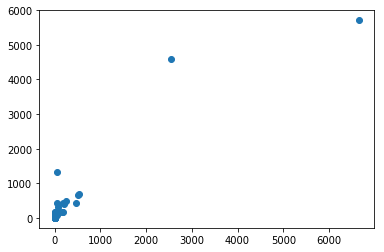

In [38]:
mammals = pd.read_csv('mammals.csv')
plt.scatter(mammals['body'], mammals['brain'])

In [39]:
body_data = mammals['body']
body_data.shape

(62,)

In [40]:
brain_data = mammals['brain']
brain_data.shape

(62,)

In [41]:
import statsmodels.api as sm
body_data = sm.add_constant(body_data)

In [42]:
regression1 = sm.OLS(brain_data, body_data).fit()

In [43]:
import statsmodels.formula.api as smf
regression2 = smf.ols(formula =\
'brain ~ body',\
data = mammals).fit()

In [44]:
regression1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  brain   R-squared:                       0.873
Model:                            OLS   Adj. R-squared:                  0.871
Method:                 Least Squares   F-statistic:                     411.2
Date:                Sun, 20 Jan 2019   Prob (F-statistic):           1.54e-28
Time:                        22:48:58   Log-Likelihood:                -447.38
No. Observations:                  62   AIC:                             898.8
Df Residuals:                      60   BIC:                             903.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         91.0044     43.553      2.090      0.041       3.886     178.123
body           0.9665      0.048     20.278      0.000       0.871       1.062
==============================================================================
Omnibus:                       92.942   Durbin-Watson:                   2.339
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1738.656
Skew:                           4.382   Prob(JB):                         0.00
Kurtosis:                      27.417   Cond. No.                         936.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
regression2.params

Intercept    91.004396
body          0.966496
dtype: float64

In [46]:
new_body = np.linspace(0,7000,10)

In [47]:
brain_pred=regression2.predict(exog=\
dict(body=new_body))
print(brain_pred)

0      91.004396
1     842.723793
2    1594.443190
3    2346.162587
4    3097.881985
5    3849.601382
6    4601.320779
7    5353.040176
8    6104.759573
9    6856.478970
dtype: float64


In [48]:
%pylab inline
import numpy as np
import pandas as pd
mammals = pd.read_csv('mammals.csv')

Populating the interactive namespace from numpy and matplotlib


In [49]:
body_data = mammals[['body']]
brain_data = mammals[['brain']]

In [50]:
from sklearn import linear_model
sk_regr = linear_model.LinearRegression()

In [51]:
sk_regr.fit(body_data, brain_data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
print(sk_regr.coef_)

[[0.96649637]]


In [53]:
print(sk_regr.intercept_)

[91.00439621]


In [54]:
print(sk_regr.score(body_data, brain_data))

0.8726620843043331


In [55]:
new_body = np.linspace(0, 7000, 10)
new_body = new_body[:, np.newaxis]
brain_pred = sk_regr.predict(new_body)

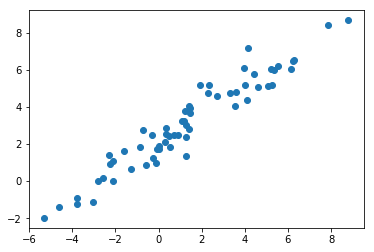

In [57]:
from numpy import log
mammals['log_body'] = log(mammals['body'])
mammals['log_brain'] = log(mammals['brain'])
plt.scatter(mammals['log_body'], mammals['log_brain'])

In [60]:
log_lm=smf.ols(formula = 'log_brain ~ log_body',\
data = mammals).fit()

In [61]:
log_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_brain   R-squared:                       0.921
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     697.4
Date:                Sun, 20 Jan 2019   Prob (F-statistic):           9.84e-35
Time:                        22:59:06   Log-Likelihood:                -64.336
No. Observations:                  62   AIC:                             132.7
Df Residuals:                      60   BIC:                             136.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1348      0.096     22.227      0.000       1.943       2.327
log_body       0.7517      0.028     26.409      0.000       0.695       0.809
==============================================================================
Omnibus:                        2.698   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.260   Jarque-Bera (JB):                1.933
Skew:                           0.405   Prob(JB):                        0.380
Kurtosis:                       3.301   Cond. No.                         3.73
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
log_lm.ssr

28.922710421460643

In [65]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
mammals_minmax = pd.DataFrame(\
                              scaler.fit_transform(mammals[['body', 'brain']]),\
                              columns = ['body','brain'])

In [66]:
mammals_minmax.groupby(lambda idx: 0).\
agg(['min','max'])

body      brain     
   min  max   min  max
0  0.0  1.0   0.0  1.0

In [67]:
scaler2 = preprocessing.StandardScaler()
mammals_std = pd.DataFrame(\
                           scaler2.fit_transform(mammals[['body','brain']]),\
columns = ['body','brain'])

In [68]:
mammals_std.groupby(lambda idx: 0).\
agg(['mean','std'])

body                   brain          
           mean       std          mean       std
0  1.790682e-18  1.008163 -3.223228e-17  1.008163

In [69]:
#Polynomial Regression
mammals['body_squared']=mammals['body']**2

In [70]:
poly_reg=smf.ols(formula=\
                 'brain~body+body_squared',\
                 data=mammals).fit()

In [71]:
print(poly_reg.params)

Intercept       19.115299
body             2.123929
body_squared    -0.000189
dtype: float64


In [72]:
poly_brain_pred=poly_reg.predict(exog=\
                                 dict(body=new_body,\
                                      body_squared=new_body**2))

In [74]:
x = np.random.random_sample(500)
x1, x2 = x**9, x**10
cor_mat = np.corrcoef(x1,x2)

In [75]:
print(cor_mat)

[[1.        0.9985704]
 [0.9985704 1.       ]]


In [76]:
mammals['body_cubed']=mammals['body']**3

In [77]:
from sklearn import preprocessing
X = mammals[['body','body_squared','body_cubed']]
Y = mammals[['brain']]
Xscaled = preprocessing.\
StandardScaler().fit_transform(X)
Yscaled = preprocessing.\
StandardScaler().fit_transform(Y)

In [78]:
import sklearn.model_selection as ms
XTrain, XTest, yTrain, yTest =\
ms.train_test_split(Xscaled, Yscaled,\
                    test_size= 0.2, random_state=42)

In [79]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
lambda_range = linspace(0.001,0.2,25)
lambda_grid = [{'alpha': lambda_range}]

In [80]:
model1 = Ridge(max_iter=10000)
cv_ridge = GridSearchCV(estimator=model1,\
                        param_grid=lambda_grid,\
                        cv=ms.KFold(n_splits=20))
cv_ridge.fit(XTrain, yTrain)
model2 = Lasso(max_iter=10000)
cv_lasso = GridSearchCV(estimator=model2,\
                        param_grid=lambda_grid,\
                        cv=ms.KFold(n_splits=20))
cv_lasso.fit(XTrain, yTrain)

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=False),
       error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'alpha': array([0.001  , 0.00929, 0.01758, 0.02588, 0.03417, 0.04246, 0.05075,
       0.05904, 0.06733, 0.07563, 0.08392, 0.09221, 0.1005 , 0.10879,
       0.11708, 0.12538, 0.13367, 0.14196, 0.15025, 0.15854, 0.16683,
       0.17513, 0.18342, 0.19171, 0.2    ])}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [81]:
cv_ridge.best_params_['alpha'],\
cv_lasso.best_params_['alpha']

(0.13366666666666668, 0.009291666666666667)

In [82]:
bestLambda_lasso=cv_lasso.best_params_['alpha']
Brain_Lasso = Lasso(alpha=bestLambda_lasso,\
                    max_iter=10000)
Brain_Lasso.fit(XTrain,yTrain)
print(Brain_Lasso.coef_)

[ 1.65028091 -0.         -0.76712502]


In [83]:
lasso_prediction = Brain_Lasso.predict(XTest)
print("Residual sum of squares:%.4f"\
      % np.mean((lasso_prediction - yTest)**2))

Residual sum of squares:0.0114
